# Notebook 1: Exposure to Airborne Chemicals

Welcome to CIVENG-119 Notebook 1! In this notebook we will be looking at concentrations of airbourne chemicals in Bay Area neighborhoods.

Throughout this notebook you will learn to:

- TBD
- TBD
- TBD


**--Maybe we can add some historical background about airbourne chemicals once we have learning objectives--**

<br>

# Introduction to the Data

The dataset we will be working with throughout this notebook is taken from the Center for Air, Climate, and Energy Solutions (CACES). CACES is a multi-university research center housed in Carnegie Mellon University and partnered with the Environmental Protection Agency (EPA). The research facility studies the impact of electricity, transportation, and urban development on air quality and human health. 


This data set in particular looks at the concentrations of common pollutants in Bay Area neighborhoods (by census level blocks) over a 32-month period (May 2015 - December 2017). Pollutant measures were taken using mobile monitor moving through streets in four counties of the San Francisco Bay Area.


This dataset includes measurements of four pollutants:
- NO (units: ppb)
- NO2 (units:ppb)
- BC (black carbon, units: µg/m3)
- UFP (ultrafine particle count)


**Run the cell below to import it!**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('datasets/Google Street View.csv')
data = data.drop(["Unnamed: 0", "samplingTime_NO", "visits_NO", "uniqueDays_NO", "samplingTime_NO2", "visits_NO2", 
                  "uniqueDays_NO2", "samplingTime_BC", "visits_BC", "uniqueDays_BC", "samplingTime_UFP", "visits_UFP", 
                  "uniqueDays_UFP"], axis=1)
data = data.dropna()
data.head()

,GISJOIN,TotalPop.x,WhiteNH,BlackNH,NativeNH,AsianNH,PacIsl,OtherNH,HispLat,OtherRace,NO,NO2,BC,UFP,Neighborhood
1,G06000104011003017,162,60,32,0,20,1,0,49,1,6.258333,9.298000,0.330840,45.300000,Downtown Oakland
2,G06000104011003018,4,0,4,0,0,0,0,0,0,14.000000,17.822500,0.615345,43.800000,Downtown Oakland
3,G06000104011003019,0,0,0,0,0,0,0,0,0,24.000000,18.619250,0.797645,43.500000,Downtown Oakland
4,G06000104013001000,0,0,0,0,0,0,0,0,0,20.000000,15.316000,0.535262,40.683333,Downtown Oakland
5,G06000104013001001,0,0,0,0,0,0,0,0,0,29.999999,18.985499,0.810837,53.000000,Downtown Oakland


Here is a breakdown of the dataframe above and what each column represents. 


|Column Name   | Description |
|--------------|---------|
|GISJOIN | GISJOIN identifier |
|TotalPop.x| Total Population of census block|
|WhiteNH | Population of White alone or in combination with one or more other races (Not Hispanic or Latino) Residents |
|BlackNH |Population of Black or African American alone or in combination with one or more other races (Not Hispanic or Latino) Residents |
|NativeNH | Population of American Indian and Alaska Native alone or in combination with one or more other races (Not Hispanic or Latino) Residents |
|AsianNH|Population of Asian alone or in combination with one or more other races (Not Hispanic or Latino) Residents|
|PacIsl|Population of Native Hawaiian and Other Pacific Islander alone or in combination with one or more other races (Not Hispanic or Latino) Residents |
|OtherNH |Population of Residents of some Other Race alone or in combination with one or more other races (Not Hispanic or Latino) |
|HispLat| Population of Hispanic or Latino Residents|
|OtherRace |Population of Residents of some Other Race alone or in combination with one or more other races|
|NO | NO measure |
|NO2 | NO2 measure |
|BC | BC measure |
|UFP | UFP measure |
|Neighborhood | Neighborhood the census block is in |


<br>

# Calculating Statistics

Calculating statistics is a useful first step when analysing a data set with numerical data because it allows us to have a high level understanding of general trends of the whole data set. Additionally, as we look closer at specific aspects of the data set later on, having rough statistics in mind will allow us to pin point abnormal data points. Below we will learn how to calculate the average, standard deviation and variance of the data set using the numpy package. 

## Average

Here we use the `.mean()` function to calculate the average pollutant measure across the whole population.

In [3]:
pop_avg = pd.DataFrame({'Avg NO': [data['NO'].mean()], 'Avg NO2': [data['NO2'].mean()],
                        'Avg BC': [data['BC'].mean()], 'Avg UFP': [data['UFP'].mean()]})
pop_avg

,Avg NO,Avg NO2,Avg BC,Avg UFP
0,7.097175,9.948856,0.364163,23.823489


Now that we have a rough understanding of what the overall averages of each pollutant is in the Bay Area, we can take a more granular look at the average measure of each pollutant in each neighborhood. 

First, we create a subset table of the data with just the pollutant measures and neighborhood. Each row in the table below represents a census block.  

In [4]:
pollutant_neighborhood = data[['NO','NO2','BC', 'UFP', 'Neighborhood']]
pollutant_neighborhood

,NO,NO2,BC,UFP,Neighborhood
1,6.258333,9.298000,0.330840,45.300000,Downtown Oakland
2,14.000000,17.822500,0.615345,43.800000,Downtown Oakland
3,24.000000,18.619250,0.797645,43.500000,Downtown Oakland
4,20.000000,15.316000,0.535262,40.683333,Downtown Oakland
5,29.999999,18.985499,0.810837,53.000000,Downtown Oakland
...,...,...,...,...,...
6422,8.750000,13.726750,0.612943,32.417463,Millbrae
6425,6.000000,13.157750,0.489638,36.126069,Millbrae
6427,7.250000,14.690000,0.504677,41.350000,Millbrae
6430,9.000000,15.278666,0.741090,47.800000,Millbrae


Using the table we just created, we use the `.groupby()` function to group by the neighborhood and use mean as the aggregate function to calculate the mean of each pollutant in each neighborhood. 

In [5]:
pollutant_neighborhood.groupby('Neighborhood').agg('mean')

,NO,NO2,BC,UFP
Neighborhood,,,,
Berkeley,8.585843,10.646862,0.295799,22.216268
Downtown Oakland,13.862251,14.904861,0.445803,35.915337
East Oakland,6.852084,9.743595,0.283316,25.798940
Fruitvale Group,9.856481,11.546796,0.390609,26.119372
Livermore,1.933129,5.711881,0.252740,14.772433
Millbrae,4.244924,11.044617,0.630897,27.244562
Palo Alto,3.178907,6.221369,0.373183,21.481793
Redwood City,4.190320,8.574843,0.498178,20.648802
SF Financial,12.223029,14.862187,0.443114,25.187513


**Question:** Are there any neighborhoods that have abnormally high or low measures in any of the pollutant measures? 

*Your answer here*

**Have students repeat above process with standard deviation and variance or wlak them through it like we did above**

<br>

## Standard Deviation

In [6]:
pop_std = pd.DataFrame({'NO Std': [data['NO'].std()], 'NO2 Std': [data['NO2'].std()],
                        'BC Std': [data['BC'].std()], 'UFP Std': [data['UFP'].std()]})
pop_std

,NO Std,NO2 Std,BC Std,UFP Std
0,8.00742,5.01112,0.220907,12.175285


In [7]:
pollutant_neighborhood.groupby('Neighborhood').std()

,NO,NO2,BC,UFP
Neighborhood,,,,
Berkeley,6.236860,3.794144,0.116737,5.266068
Downtown Oakland,10.975234,4.400313,0.228247,11.209499
East Oakland,8.377705,3.648431,0.154390,8.982046
Fruitvale Group,7.361901,3.584890,0.208672,9.750039
Livermore,4.227244,3.303943,0.129802,4.342328
Millbrae,6.410346,4.512948,0.270038,14.133764
Palo Alto,5.149841,4.086054,0.253088,9.004683
Redwood City,4.078280,2.417896,0.188784,5.998054
SF Financial,7.338289,4.295056,0.234053,7.291859


<br>

## Variance

In [8]:
pop_var = pd.DataFrame({'NO Var': [data['NO'].var()], 'NO2 Var': [data['NO2'].var()],
                        'BC Var': [data['BC'].var()], 'UFP Var': [data['UFP'].var()]})
pop_var

,NO Var,NO2 Var,BC Var,UFP Var
0,64.118773,25.111327,0.0488,148.237558


In [9]:
pollutant_neighborhood.groupby('Neighborhood').var()

,NO,NO2,BC,UFP
Neighborhood,,,,
Berkeley,38.898428,14.395529,0.013628,27.731468
Downtown Oakland,120.455770,19.362753,0.052097,125.652870
East Oakland,70.185946,13.311049,0.023836,80.677141
Fruitvale Group,54.197589,12.851433,0.043544,95.063260
Livermore,17.869594,10.916038,0.016849,18.855815
Millbrae,41.092538,20.366700,0.072920,199.763284
Palo Alto,26.520858,16.695839,0.064053,81.084322
Redwood City,16.632364,5.846219,0.035639,35.976654
SF Financial,53.850492,18.447507,0.054781,53.171210


The neighborhoods that fell into the top five of each pollutant the most often were: Downtown Oakland, SF Financial, Millbrae, Fruitvale, West Oakland.

<br>

# Histograms

In [32]:
neighborhoods = list(data['Neighborhood'].unique())
races = ['WhiteNH', 'BlackNH', 'NativeNH', 'AsianNH', 'PacIsl', 'OtherNH', 'HispLat', 'OtherRace']
sns.set(rc = {'figure.figsize':(20,8)})

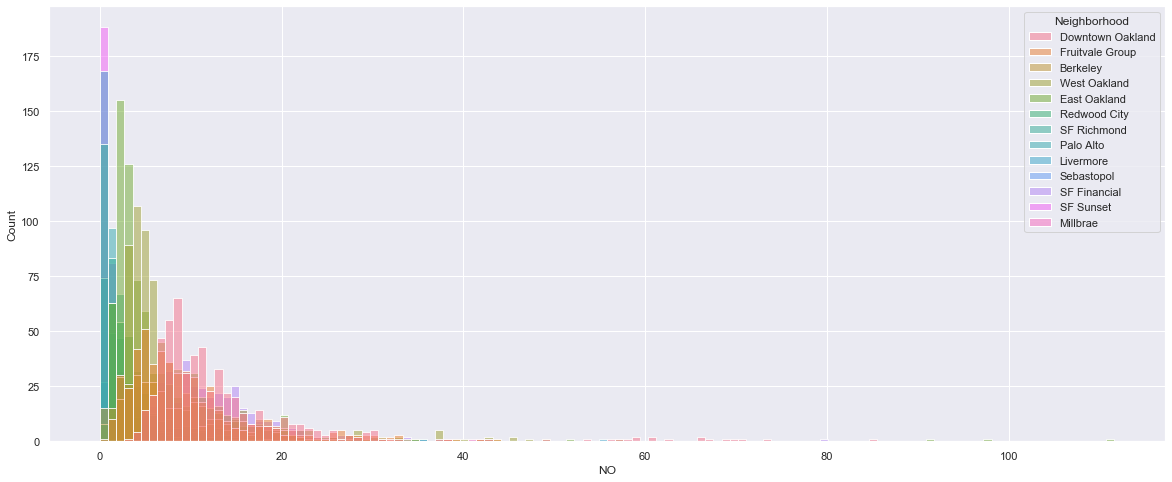

In [33]:
sns.histplot(data, x="NO", hue="Neighborhood")

# NO2

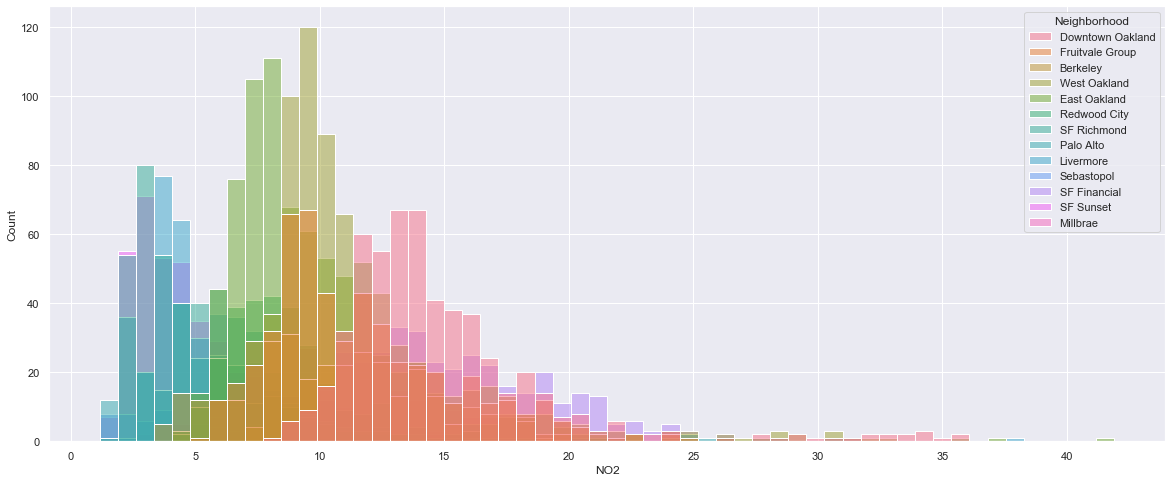

In [13]:
sns.histplot(data, x="NO2", hue="Neighborhood")

# BC

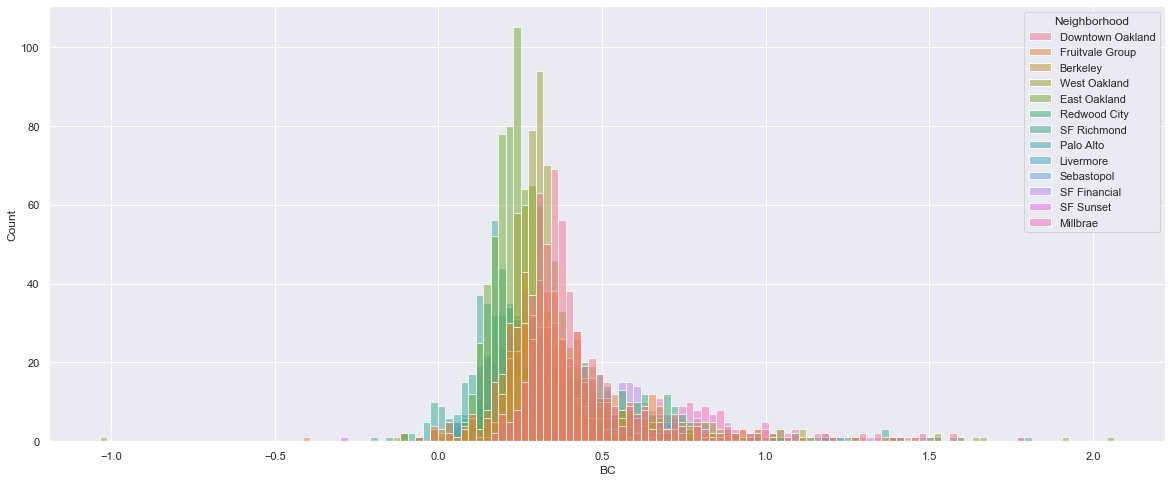

In [14]:
sns.histplot(data, x="BC", hue="Neighborhood")

# UFP

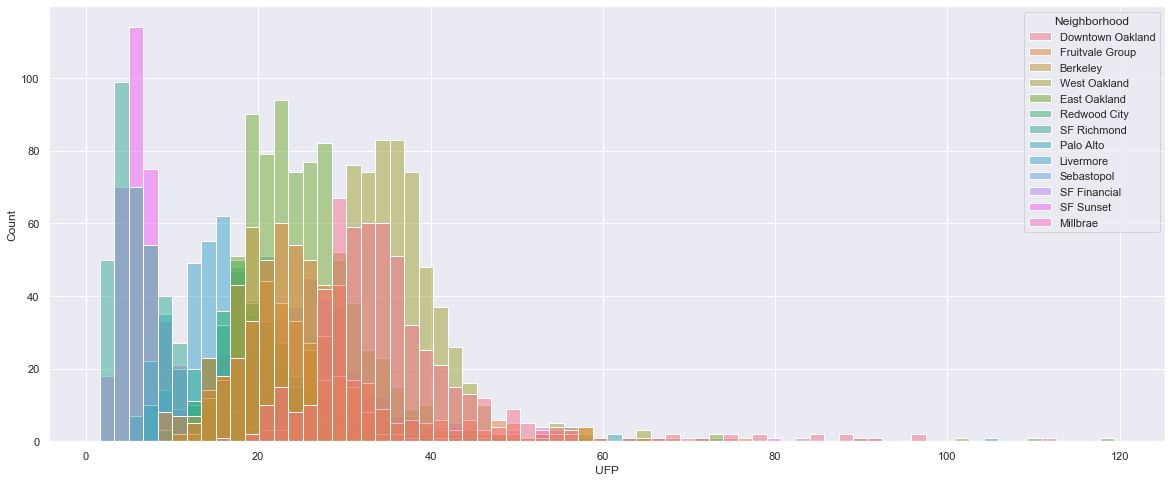

In [15]:
sns.histplot(data, x="UFP", hue="Neighborhood")

Levels of each pollutant based on highest amount of each race.

<br>

# Visualizing with `seaborn`

In this section, you'll be learning how to visualize data with the Python library `seaborn`. If you have already taken Data 8, you may remember using the matplotlib/plt library to do visualizations. `seaborn` is built on top of `matplotlib` and shares many of the commands has a similar workflow. 

Let's take a look at `seaborn` in action!

We'll be using the tips dataset to learn about boxplots in `seaborn`. Start by reading in the data

In [16]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Let's make a boxplot with `day` on the x-axis and `total_bill` on the y-axis. To do this, we're gonna use `sns.boxplot`. To get the x-axis to be `day`, we're going to assign x to equal a string of the label we want on the x-axis (in this case, `day`). The same thing happens for the y-axis. In order for `seaborn` to know which dataframe we want to use for this plot, make sure that `data` is assigned to the name of the dataframe you want to use in this plot.

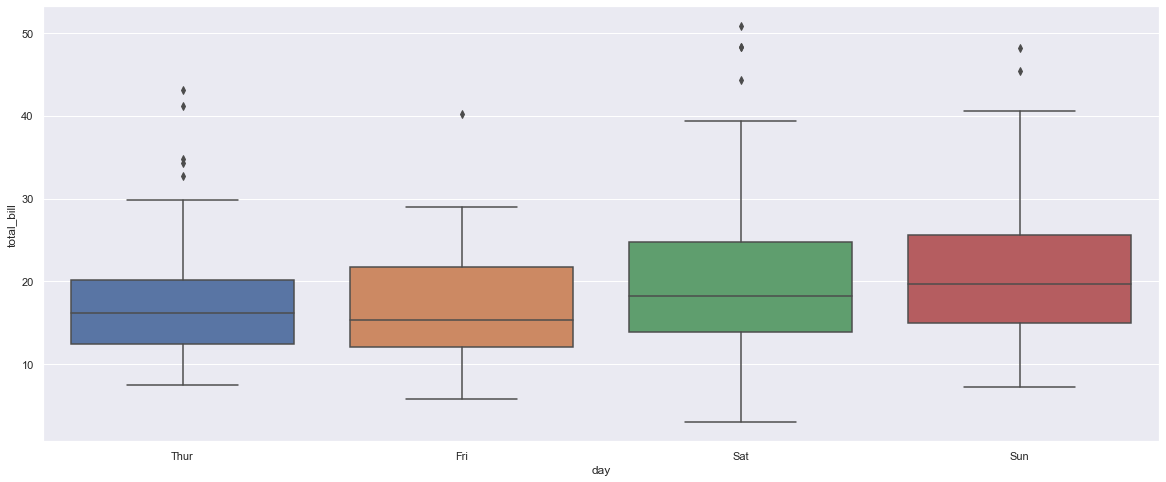

In [17]:
sns.boxplot(x="day",y="total_bill",data=tips)

Now let's add some labels to the visualization. This can be done using `plt.xlabel()` and `plt.ylabel()`. *Note that the prefix is `plt` and not `sns`*. This is because `matplotlib` is being used to control parts of `seaborn`.

Text(0, 0.5, 'Total Bill')

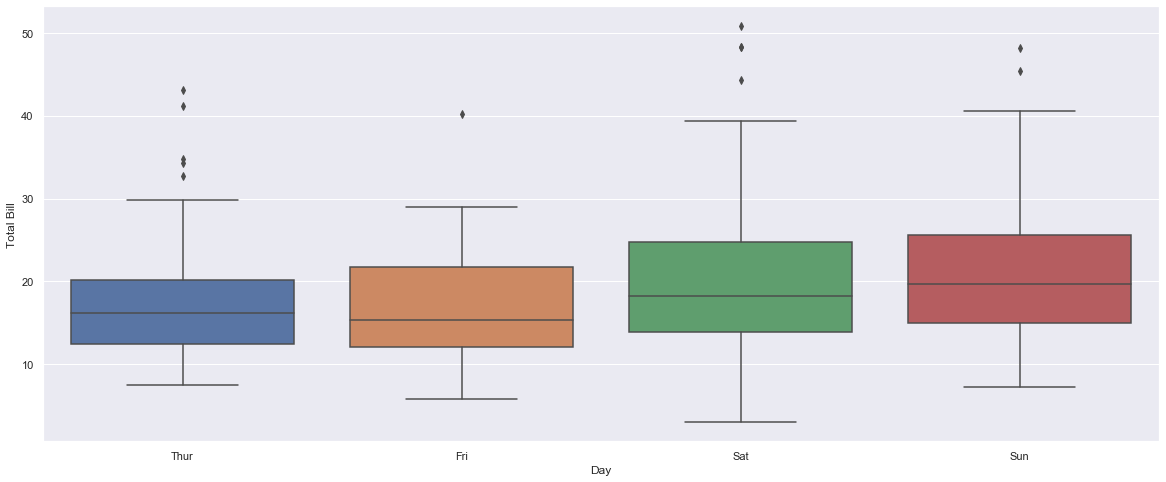

In [18]:
sns.boxplot(x="day",y="total_bill",data=tips)

# Uses plt and not sns
plt.xlabel("Day")
plt.ylabel("Total Bill")

What about those points outside of the boxplot? We can remove them using the `showfliers` argument inside of the `sns.boxplot` method. Setting this to `False` removes outliers from the visualization.

Text(0, 0.5, 'Total Bill')

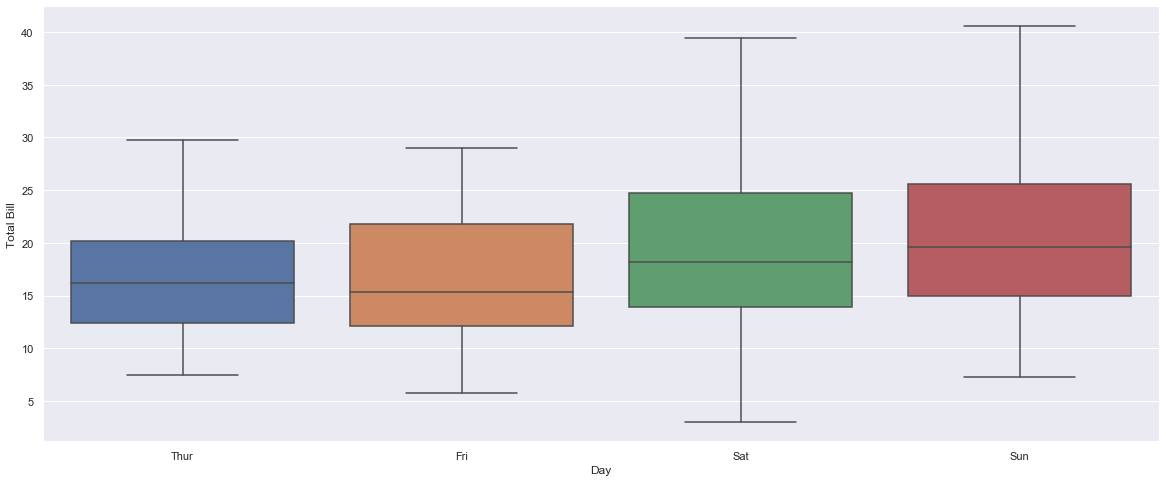

In [19]:
sns.boxplot(x="day",y="total_bill",data=tips, showfliers=False)
plt.xlabel("Day")
plt.ylabel("Total Bill")

What if we want to see the mean of each boxplot in addition to the median that is built into the boxplot? We can use `showmeans` to accomplish. Set this to `True` to add in the mean on the boxplot. We can also edit the appearance of the mean point using `meanprops`. You don't have to know how this part works. You can just use it!

Text(0, 0.5, 'Total Bill')

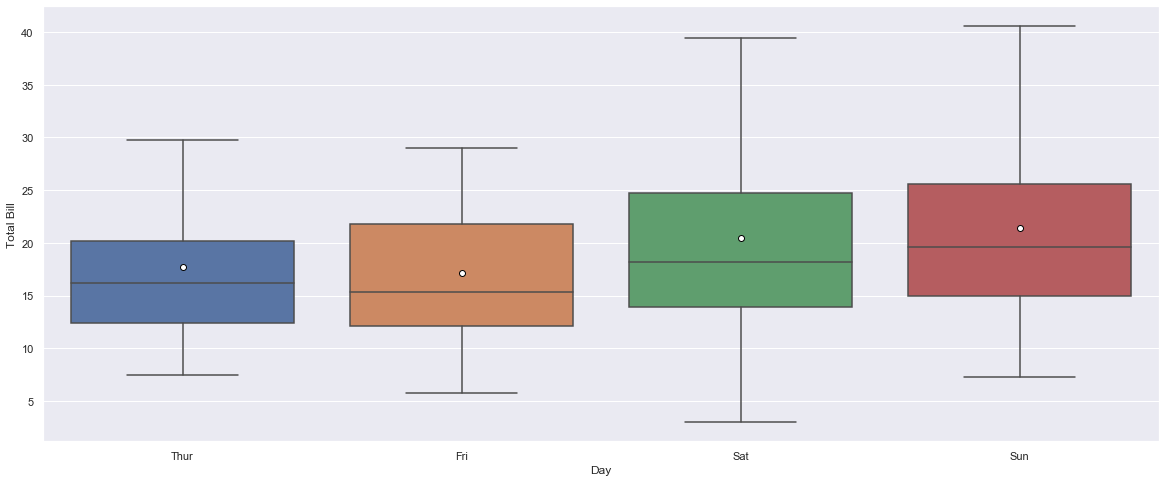

In [20]:
sns.boxplot(x="day",y="total_bill",data=tips, showfliers=False, showmeans=True,
           meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})
plt.xlabel("Day")
plt.ylabel("Total Bill")

Finally, let's adjust the labels on the x-axis so it is easier to read when there are many labels. We can use `plt.tick_params()` to do this. *Note again that we are using `plt` for this and not `sns`*.

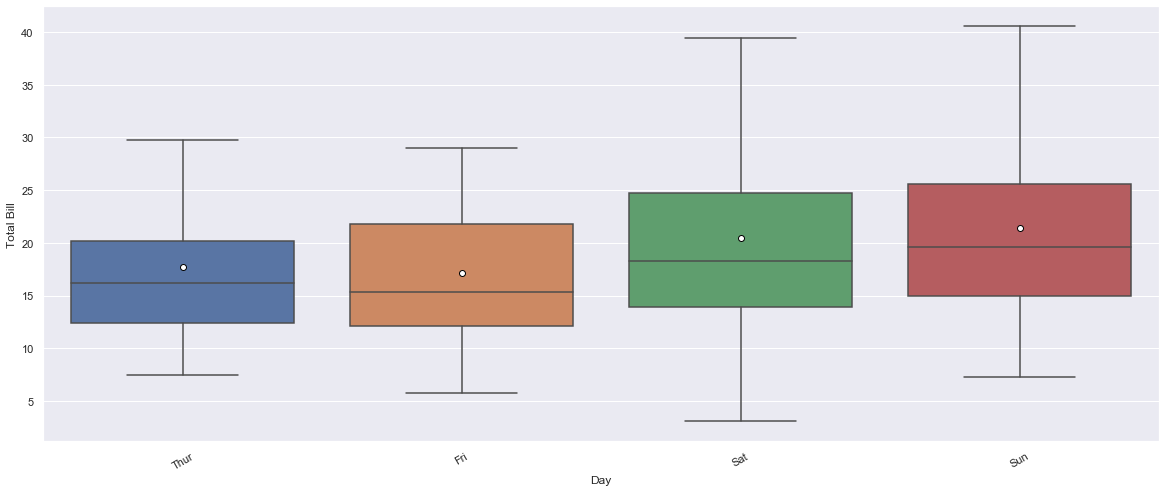

In [21]:
sns.boxplot(x="day",y="total_bill",data=tips, showfliers=False, showmeans=True,
           meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})
plt.xlabel("Day")
plt.ylabel("Total Bill")
# Selects the x-axis labels and rotates them 30 degrees
plt.tick_params(axis="x", labelrotation = 30)

<br>

## Plotting concentrations and neighborhoods

Now it's your turn! In this section, you will be applying the things you learned to create boxplots about chemical concentration and neighborhoods in the Bay Area.

Create a boxplot with:
* `Neighborhood` on the x-axis.
* `NO` on the y-axis. 
* Make sure you set the `data` parameter to equal the name of out dataframe, `data`.
* No outliers (remember `showfliers`).
* The means shown on the boxplot (`showmeans`).
* Labels on the x-axis rotated 30 degrees.

In [22]:
# You can just run this cell!

# This cell orders the neighborhoods so they are in order for your visualization
order = data[["NO","Neighborhood"]].groupby("Neighborhood").median().sort_values("NO",ascending=False).index

In [23]:
"""sns.boxplot(x=...,y=...,data=..., showfliers=..., order=order, showmeans=...,
           meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})
plt.tick_params(axis="x", labelrotation = ...)"""

'sns.boxplot(x=...,y=...,data=..., showfliers=..., order=order, showmeans=...,\n           meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})\nplt.tick_params(axis="x", labelrotation = ...)'

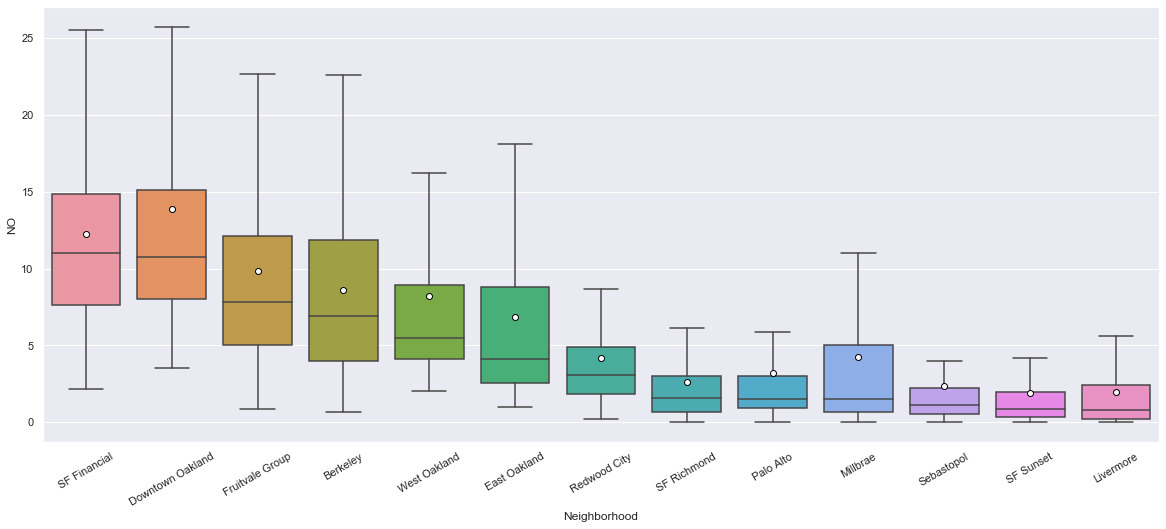

In [24]:
sns.boxplot(x="Neighborhood",y="NO",data=data, showfliers=False, order=order, showmeans=True,
           meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})
plt.tick_params(axis="x", labelrotation = 30)

Now do the same thing with `NO2` on the y-axis.

In [25]:
# Just run this cell!
order2 = data[["NO2","Neighborhood"]].groupby("Neighborhood").median().sort_values("NO2",ascending=False).index

In [26]:
# Your code here!

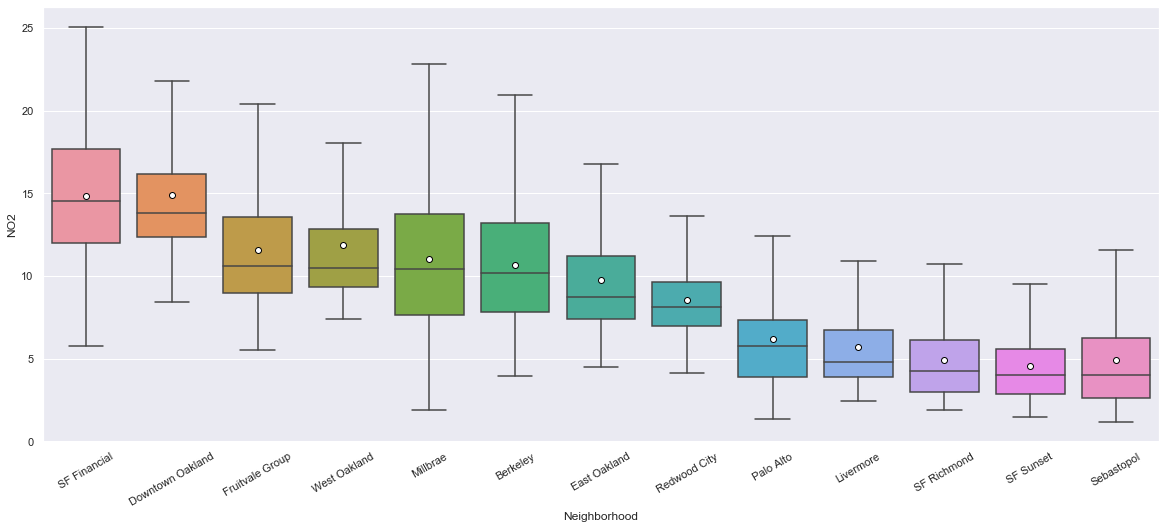

In [27]:
sns.boxplot(x="Neighborhood",y="NO2",data=data, showfliers=False, order=order2, showmeans=True,
           meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})
plt.tick_params(axis="x", labelrotation = 30)

Great job! Now have `BC` on the y-axis.

In [28]:
# Just run this cell!
order3 = data[["BC","Neighborhood"]].groupby("Neighborhood").median().sort_values("BC",ascending=False).index

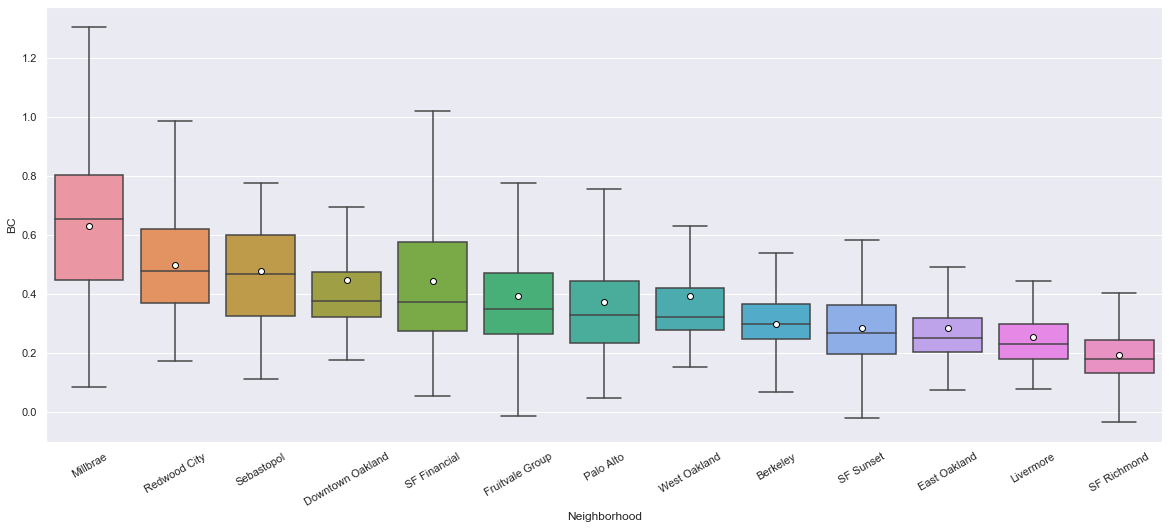

In [29]:
sns.boxplot(x="Neighborhood",y="BC",data=data, showfliers=False, order=order3, showmeans=True,
           meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})
plt.tick_params(axis="x", labelrotation = 30)

Last one! Put `UFP` on the y-axis.

In [30]:
# Just run this cell
order4 = data[["UFP","Neighborhood"]].groupby("Neighborhood").median().sort_values("UFP",ascending=False).index

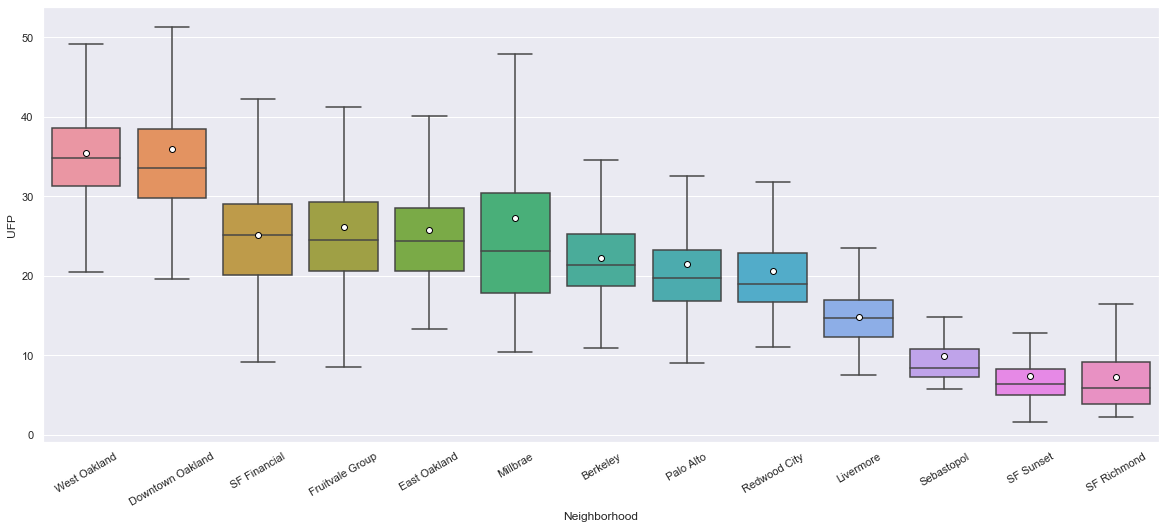

In [31]:
sns.boxplot(x="Neighborhood",y="UFP",data=data, showfliers=False, order=order4, showmeans=True,
           meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})
plt.tick_params(axis="x", labelrotation = 30)

<br>

Created by Aaron Moore, Chuyi Shang, Melisa Esqueda, Kinsey Long & Karalyn Chong